# NanoAODplus_analyzer

In [2]:
import time

from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from awkward import JaggedArray
import numpy as np
from pprint import pprint

from nanoAODplus_processor.GenParticleProcessor import GenParticleProcessor
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [ ]:
tstart = time.time()

files = {'JpsiDzero': ['/afs/cern.ch/work/m/mabarros/public/MonteCarlo/CMSSW_10_6_12/src/Analyzer_files/JpsiDzero_13TeV_GenParticle.root']}

output = processor.run_uproot_job(files,
                                  treename='Events',
                                  processor_instance=GenParticleProcessor(),
                                  #executor=processor.iterative_executor,
                                  #executor_args={'flatten': True},
                                  executor=processor.futures_executor,
                                  #executor_args={'workers': 6, 'flatten': True},
                                  executor_args={'workers': 8, 'flatten': True},
                                  chunksize=100,
                                 # maxchunks=10,
                                 )

elapsed = time.time() - tstart
print(output)

In [ ]:
ax = hist.plot1d(output['Dplus_rec_mass'], overlay='dataset')
ax.set_xlim(1.76, 2.0)

In [ ]:
ax = hist.plot1d(output['Dplus_rec_pt'], overlay='dataset')
ax.set_xlim(0, 20)


In [ ]:
ax = hist.plot1d(output['Dplus_rec_phi'], overlay='dataset')

In [ ]:
ax = hist.plot1d(output['Dplus_rec_eta'], overlay='dataset')

In [ ]:
import awkward
a = awkward.fromiter([[1.1, 2.2, 3.3], [], [4.4, 5.5], [6.6, 7.7, 8.8, 9.9]])
b = awkward.fromiter([["one", "two"], ["three"], ["four", "five", "six"], ["seven"]])
cc = a.cross(b)
cc

In [ ]:
ax = hist.plot1d(output['Dimuon_pt'], overlay='dataset')
ax.set_xlim(0,15)

In [ ]:
ax= hist.plot1d(output['Dimuon_eta'], overlay='dataset')

In [ ]:
ax= hist.plot1d(output['Dimuon_phi'], overlay='dataset')

In [ ]:
ax= hist.plot1d(output['D0_mass'], overlay='dataset')
ax.set_xlim(1.0,2.5)

In [ ]:
ax= hist.plot1d(output['D0_pt'], overlay='dataset')
ax.set_xlim(0,7.5)

In [ ]:
ax= hist.plot1d(output['D0_eta'], overlay='dataset')

In [ ]:
ax= hist.plot1d(output['D0_phi'], overlay='dataset')

In [1]:
##################################### Test section ##############################################

import uproot

import coffea.hist as hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from awkward import JaggedArray
import numpy as np
from pprint import pprint

import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

branches = ['nGenPart', 'GenPart_pt', 'GenPart_eta', 'GenPart_phi', 'GenPart_mass', 'GenPart_charge', 'GenPart_pdgId', 'GenPart_mpdgId', 'GenPart_vx', 'GenPart_vy', 'GenPart_vz',]
file = ['/afs/cern.ch/work/m/mabarros/public/MonteCarlo/CMSSW_10_6_12/src/Analyzer_files/JpsiDzero_13TeV_GenParticle.root']

for chunk in uproot.iterate(file, 'Events', branches=branches, entrysteps=500000, namedecode='ascii'):
    GenParticle = JaggedCandidateArray.candidatesfromcounts(chunk['nGenPart'],
                                            pt=chunk['GenPart_pt'].content,
                                            eta=chunk['GenPart_eta'].content,
                                            phi=chunk['GenPart_phi'].content,
                                            mass=chunk['GenPart_mass'].content,
                                            charge=chunk['GenPart_charge'].content,
                                            pdgId=chunk['GenPart_pdgId'].content,
                                            mpdgId=chunk['GenPart_mpdgId'].content,
                                            vx=chunk['GenPart_vx'].content,
                                            vy=chunk['GenPart_vy'].content,
                                            vz=chunk['GenPart_vz'].content,
                                           )
sample = hist.Cat("sample", "Process")

In [4]:
jpsiid = (np.absolute(GenParticle.pdgId) == 443)
Jpsi = GenParticle[jpsiid]
mass_cut_Jpsi = ((Jpsi.mass < 3.2) & (Jpsi.mass > 2.9))
Jpsi = Jpsi[mass_cut_Jpsi]

In [2]:
Jpsi_mass_axis = hist.Bin("mass", r"$m_{J/\Psi}$ [GeV]", 10, 2.9, 3.2)
Jpsi_pt_axis = hist.Bin("pt", r"$p_{T,J/\Psi}$[GeV]" , 200, 0.0, 20)
Jpsi_eta_axis = hist.Bin("eta", r"$\eta_{J/\Psi}$", 100, -5.0, 5.0)
Jpsi_phi_axis = hist.Bin("phi", r"$\phi_{J/\Psi}$", 70, -3.5, 3.5)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


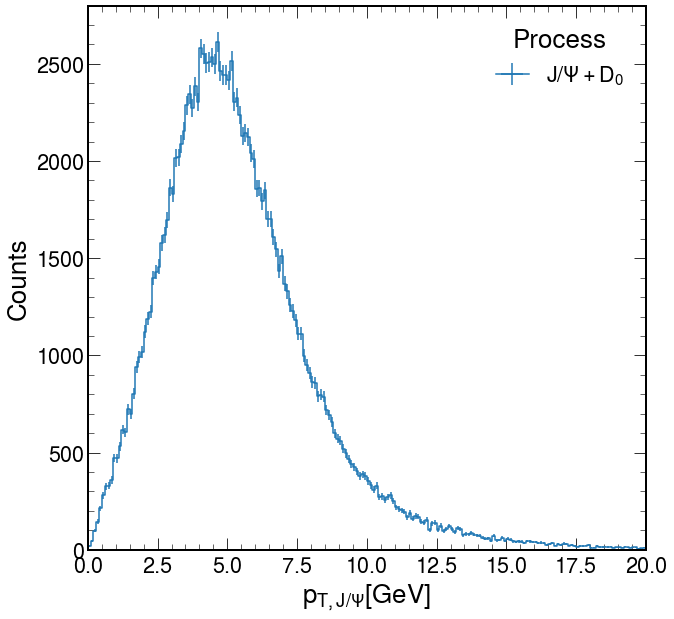

In [5]:
Jpsi_pt = hist.Hist('Counts', sample,  Jpsi_pt_axis)
Jpsi_pt.fill(sample="$J/\Psi+D_0$", pt=Jpsi.__fast_pt.flatten())
hist.plot1d(Jpsi_pt, overlay='sample')

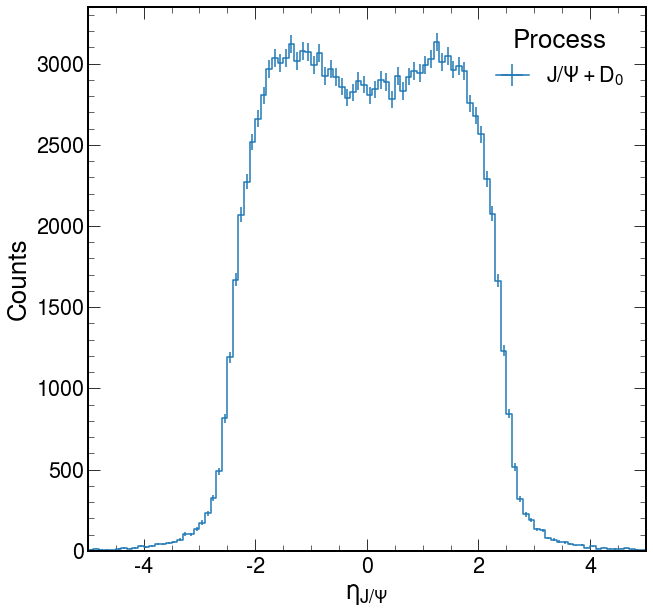

In [6]:
Jpsi_eta = hist.Hist('Counts', sample,  Jpsi_eta_axis)
Jpsi_eta.fill(sample="$J/\Psi+D_0$", eta=Jpsi.__fast_eta.flatten())
hist.plot1d(Jpsi_eta, overlay='sample')

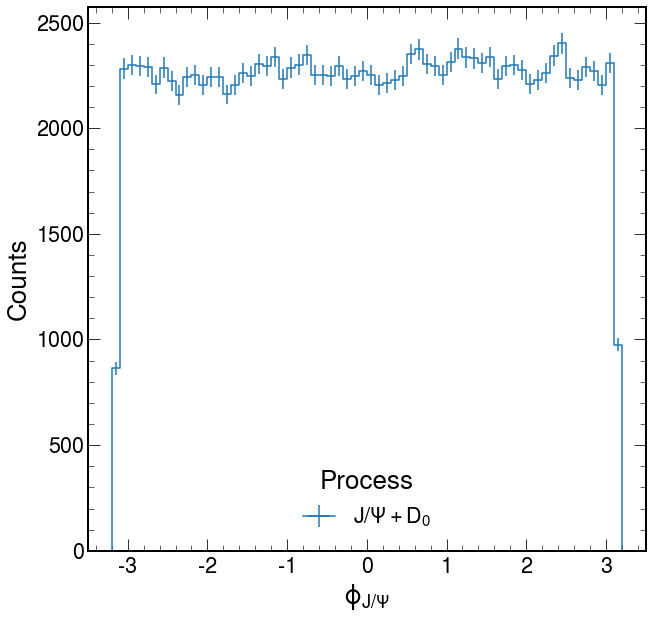

In [12]:
Jpsi_phi = hist.Hist('Counts', sample,  Jpsi_phi_axis)
Jpsi_phi.fill(sample="$J/\Psi+D_0$", phi=Jpsi.__fast_phi.flatten())
hist.plot1d(Jpsi_phi, overlay='sample')

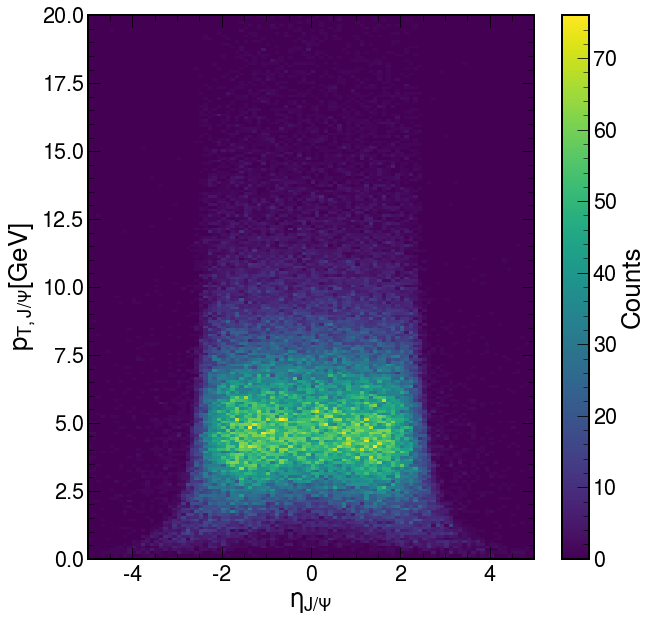

In [7]:
############## 2d plots ###################
Jpsi_eta_pt = hist.Hist('Counts', Jpsi_eta_axis, Jpsi_pt_axis)
Jpsi_eta_pt.fill(eta=Jpsi.__fast_eta.flatten(), pt=Jpsi.__fast_pt.flatten())

hist.plot2d(Jpsi_eta_pt, xaxis='eta')

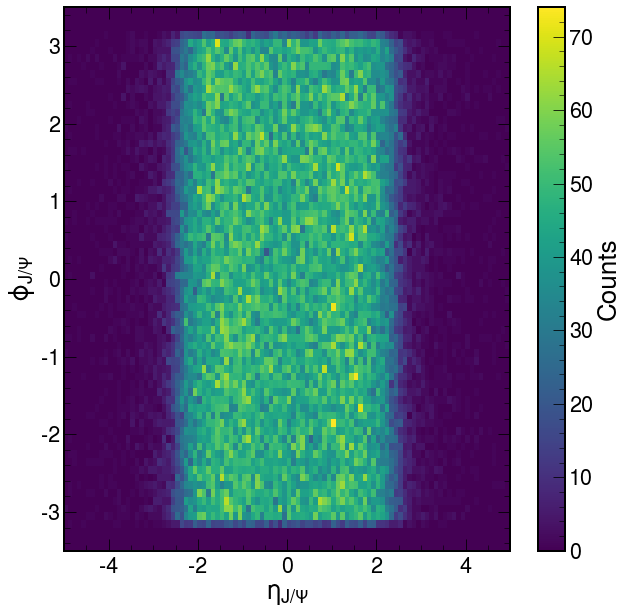

In [8]:
Jpsi_eta_phi = hist.Hist('Counts', Jpsi_eta_axis, Jpsi_phi_axis)
Jpsi_eta_phi.fill(eta=Jpsi.__fast_eta.flatten(), phi=Jpsi.__fast_phi.flatten())

hist.plot2d(Jpsi_eta_phi, xaxis='eta')

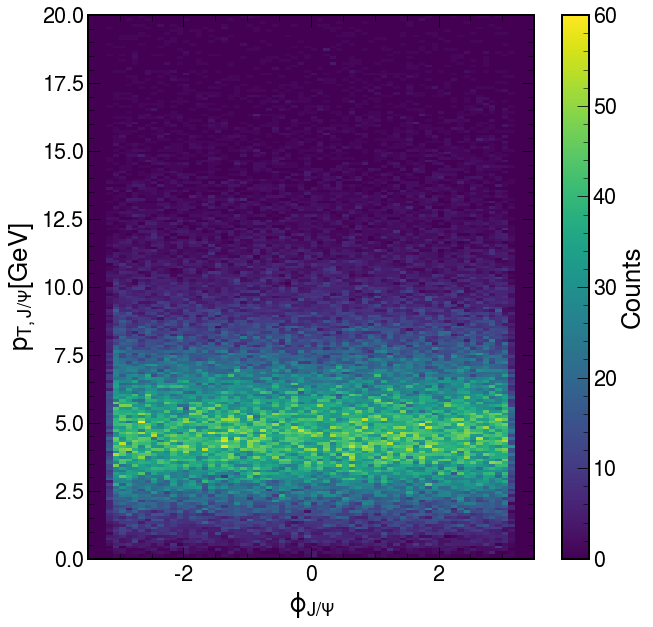

In [9]:
Jpsi_phi_pt = hist.Hist('Counts', Jpsi_phi_axis, Jpsi_pt_axis)
Jpsi_phi_pt.fill(phi=Jpsi.__fast_phi.flatten(), pt=Jpsi.__fast_pt.flatten())

hist.plot2d(Jpsi_phi_pt, xaxis='phi')

In [6]:
################################ Dzero section ########################################

dzeroid = (np.absolute(GenParticle.pdgId) == 421)
Dzero = GenParticle[dzeroid]
mass_cut_D0 = ((Dzero.mass < 1.89) & (Dzero.mass > 1.86))
Dzero = Dzero[mass_cut_D0]

In [7]:


Dzero_mass_axis = hist.Bin("mass", r"$m_{D^0}$ [GeV]", 10, 1.86, 2.00)
Dzero_pt_axis = hist.Bin("pt", r"$p_{T,D^0}$[GeV]" , 200, 0.0, 20)
Dzero_eta_axis = hist.Bin("eta", r"$\eta_{D^0}$", 100, -5.0, 5.0)
Dzero_phi_axis = hist.Bin("phi", r"$\phi_{D^0}$", 70, -3.5, 3.5)

In [ ]:
Dzero_pt = hist.Hist('Counts', sample,  Dzero_pt_axis)
Dzero_pt.fill(sample="$J/\Psi+D_0$", pt=Dzero.__fast_pt.flatten())
hist.plot1d(Dzero_pt, overlay='sample')

In [ ]:
Dzero_eta = hist.Hist('Counts', sample,  Dzero_eta_axis)
Dzero_eta.fill(sample="$J/\Psi+D_0$", eta=Dzero.__fast_eta.flatten())
hist.plot1d(Dzero_eta, overlay='sample')

In [ ]:
Dzero_phi = hist.Hist('Counts', sample,  Dzero_phi_axis)
Dzero_phi.fill(sample="$J/\Psi+D_0$", phi=Dzero.__fast_phi.flatten())
hist.plot1d(Dzero_phi, overlay='sample')

In [ ]:
############## 2d plots ###################
Dzero_eta_pt = hist.Hist('Counts', Dzero_eta_axis, Dzero_pt_axis)
Dzero_eta_pt.fill(eta=Dzero.__fast_eta.flatten(), pt=Dzero.__fast_pt.flatten())

hist.plot2d(Dzero_eta_pt, xaxis='eta')

In [ ]:
Dzero_eta_phi = hist.Hist('Counts', Dzero_eta_axis, Dzero_phi_axis)
Dzero_eta_phi.fill(eta=Dzero.__fast_eta.flatten(), phi=Dzero.__fast_phi.flatten())

hist.plot2d(Dzero_eta_phi, xaxis='eta')

In [ ]:
Dzero_phi_pt = hist.Hist('Counts', Dzero_phi_axis, Dzero_pt_axis)
Dzero_phi_pt.fill(phi=Dzero.__fast_phi.flatten(), pt=Dzero.__fast_pt.flatten())

hist.plot2d(Dzero_phi_pt, xaxis='phi')

In [ ]:
################################ Dplus section ########################################

dplusid = (np.absolute(GenParticle.pdgId) == 411)
Dplus = GenParticle[dplusid]
mass_cut_Dplus = ((Dplus.mass < 1.872) & (Dplus.mass > 1.866))
Dplus = Dplus[mass_cut_Dplus]

In [ ]:
Dplus_mass_axis = hist.Bin("mass", r"$m_{D^+}$ [GeV]", 10, 1.86, 2.00)
Dplus_pt_axis = hist.Bin("pt", r"$p_{T,D^+}$[GeV]" , 200, 0.0, 20)
Dplus_eta_axis = hist.Bin("eta", r"$\eta_{D^+}$", 50, -5.0, 5.0)
Dplus_phi_axis = hist.Bin("phi", r"$\phi_{D^+}$", 70, -3.5, 3.5)

In [ ]:
Dplus_pt = hist.Hist('Counts', sample,  Dplus_pt_axis)
Dplus_pt.fill(sample="$J/\Psi+D^+$", pt=Dplus.__fast_pt.flatten())
hist.plot1d(Dplus_pt, overlay='sample')

In [ ]:
Dplus_eta = hist.Hist('Counts', sample,  Dplus_eta_axis)
Dplus_eta.fill(sample="$J/\Psi+D^+$", eta=Dplus.__fast_eta.flatten())
hist.plot1d(Dplus_eta, overlay='sample')

In [ ]:
Dplus_phi = hist.Hist('Counts', sample,  Dplus_phi_axis)
Dplus_phi.fill(sample="$J/\Psi+D^+$", phi=Dplus.__fast_phi.flatten())
hist.plot1d(Dplus_phi, overlay='sample')

In [ ]:
############## 2d plots ###################
Dplus_eta_pt = hist.Hist('Counts', Dplus_eta_axis, Dplus_pt_axis)
Dplus_eta_pt.fill(eta=Dplus.__fast_eta.flatten(), pt=Dplus.__fast_pt.flatten())

hist.plot2d(Dplus_eta_pt, xaxis='eta')

In [ ]:
Dplus_eta_phi = hist.Hist('Counts', Dplus_eta_axis, Dplus_phi_axis)
Dplus_eta_phi.fill(eta=Dplus.__fast_eta.flatten(), phi=Dplus.__fast_phi.flatten())

hist.plot2d(Dplus_eta_phi, xaxis='eta')

In [ ]:
Dplus_phi_pt = hist.Hist('Counts', Dplus_phi_axis, Dplus_pt_axis)
Dplus_phi_pt.fill(phi=Dplus.__fast_phi.flatten(), pt=Dplus.__fast_pt.flatten())

hist.plot2d(Dplus_phi_pt, xaxis='phi')

In [ ]:
################################ Dstar section ########################################

dstarid = (np.absolute(GenParticle.pdgId) == 413)
Dstar = GenParticle[dstarid]
mass_cut_Dstar = ((Dstar.mass < 2.036) & (Dstar.mass > 1.970))
Dstar = Dstar[mass_cut_Dstar]


In [ ]:
Dstar_mass_axis = hist.Bin("mass", r"$m_{D^{*+}$ [GeV]", 10, 1.97, 2.036)
Dstar_pt_axis = hist.Bin("pt", r"$p_{T,D^{*+}}$[GeV]" , 200, 0.0, 20)
Dstar_eta_axis = hist.Bin("eta", r"$\eta_{D^{*+}}$", 100, -5.0, 5.0)
Dstar_phi_axis = hist.Bin("phi", r"$\phi_{D^{*+}}$", 70, -3.5, 3.5)

In [ ]:
Dstar_pt = hist.Hist('Counts', sample,  Dstar_pt_axis)
Dstar_pt.fill(sample=r"$J/\Psi+Dstar$", pt=Dstar.__fast_pt.flatten())
hist.plot1d(Dstar_pt, overlay='sample')

In [ ]:
Dstar_eta = hist.Hist('Counts', sample,  Dstar_eta_axis)
Dstar_eta.fill(sample=r"$J/\Psi+Dstar$", eta=Dstar.__fast_eta.flatten())
hist.plot1d(Dstar_eta, overlay='sample')

In [ ]:
Dstar_phi = hist.Hist('Counts', sample,  Dstar_phi_axis)
Dstar_phi.fill(sample=r"$J/\Psi+Dstar$", phi=Dstar.__fast_phi.flatten())
hist.plot1d(Dstar_phi, overlay='sample')

In [ ]:
############## 2d plots ###################
Dstar_eta_pt = hist.Hist('Counts', Dstar_eta_axis, Dstar_pt_axis)
Dstar_eta_pt.fill(eta=Dstar.__fast_eta.flatten(), pt=Dstar.__fast_pt.flatten())

hist.plot2d(Dstar_eta_pt, xaxis='eta')

In [ ]:
Dstar_eta_phi = hist.Hist('Counts', Dstar_eta_axis, Dstar_phi_axis)
Dstar_eta_phi.fill(eta=Dstar.__fast_eta.flatten(), phi=Dstar.__fast_phi.flatten())

hist.plot2d(Dstar_eta_phi, xaxis='eta')

In [ ]:
Dstar_phi_pt = hist.Hist('Counts', Dstar_phi_axis, Dstar_pt_axis)
Dstar_phi_pt.fill(phi=Dstar.__fast_phi.flatten(), pt=Dstar.__fast_pt.flatten())

hist.plot2d(Dstar_phi_pt, xaxis='phi')

In [ ]:
################################ Ds+ section ########################################

Dsid = (np.absolute(GenParticle.pdgId) == 431)
Ds = GenParticle[Dsid]
mass_cut_Ds = ((Ds.mass < 1.990) & (Ds.mass > 1.930))
Ds = Ds[mass_cut_Ds]

In [ ]:
Ds_mass_axis = hist.Bin("mass", r"$m_D_s^+$ [GeV]", 10, 2.0, 2.4)
Ds_pt_axis = hist.Bin("pt", r"$p_T,D_s^+$[GeV]" , 200, 0.0, 20)
Ds_eta_axis = hist.Bin("eta", r"$\eta,D_s^+$", 100, -5.0, 5.0)
Ds_phi_axis = hist.Bin("phi", r"$\phi,D_s^+$", 70, -3.5, 3.5)

In [ ]:
Ds_pt = hist.Hist('Counts', sample,  Ds_pt_axis)
Ds_pt.fill(sample="$J/\Psi+D_s^+$", pt=Ds.__fast_pt.flatten())
hist.plot1d(Ds_pt, overlay='sample')

In [ ]:
Ds_eta = hist.Hist('Counts', sample,  Ds_eta_axis)
Ds_eta.fill(sample="$J/\Psi+D_s^+$", eta=Ds.__fast_eta.flatten())
hist.plot1d(Ds_eta, overlay='sample')

In [ ]:
Ds_phi = hist.Hist('Counts', sample,  Ds_phi_axis)
Ds_phi.fill(sample="$J/\Psi+D_s^+$", phi=Ds.__fast_phi.flatten())
hist.plot1d(Ds_phi, overlay='sample')

In [ ]:
############## 2d plots ###################
Ds_eta_pt = hist.Hist('Counts', Ds_eta_axis, Ds_pt_axis)
Ds_eta_pt.fill(eta=Ds.__fast_eta.flatten(), pt=Ds.__fast_pt.flatten())

hist.plot2d(Ds_eta_pt, xaxis='eta')

In [ ]:
Ds_eta_phi = hist.Hist('Counts', Ds_eta_axis, Ds_phi_axis)
Ds_eta_phi.fill(eta=Ds.__fast_eta.flatten(), phi=Ds.__fast_phi.flatten())

hist.plot2d(Ds_eta_phi, xaxis='eta')

In [ ]:
Ds_phi_pt = hist.Hist('Counts', Ds_phi_axis, Ds_pt_axis)
Ds_phi_pt.fill(phi=Ds.__fast_phi.flatten(), pt=Ds.__fast_pt.flatten())

hist.plot2d(Ds_phi_pt, xaxis='phi')

In [ ]:
################################ Lambda section ########################################

Lambdaid = (np.absolute(GenParticle.pdgId) == 4122)
Lambda = GenParticle[Lambdaid]
mass_cut_Lambda = ((Lambda.mass < 2.3) & (Lambda.mass > 2.1))
Lambda = Lambda[mass_cut_Lambda]


In [ ]:
Lambda_mass_axis = hist.Bin("mass", r"$m_\Lambda_c^+$ [GeV]", 10, 2.0, 2.4)
Lambda_pt_axis = hist.Bin("pt", r"$p_T,\Lambda_c^+$[GeV]" , 200, 0.0, 20)
Lambda_eta_axis = hist.Bin("eta", r"$\eta,\Lambda_c^+$", 100, -5.0, 5.0)
Lambda_phi_axis = hist.Bin("phi", r"$\phi,\Lambda_c^+$", 70, -3.5, 3.5)

In [ ]:
Lambda_pt = hist.Hist('Counts', sample,  Lambda_pt_axis)
Lambda_pt.fill(sample="$J/\Psi+\Lambda_c^+$", pt=Lambda.__fast_pt.flatten())
hist.plot1d(Lambda_pt, overlay='sample')

In [ ]:
Lambda_eta = hist.Hist('Counts', sample,  Lambda_eta_axis)
Lambda_eta.fill(sample="$J/\Psi+\Lambda_c^+$", eta=Lambda.__fast_eta.flatten())
hist.plot1d(Lambda_eta, overlay='sample')

In [ ]:
Lambda_phi = hist.Hist('Counts', sample,  Lambda_phi_axis)
Lambda_phi.fill(sample="$J/\Psi+\Lambda_c^+$", phi=Lambda.__fast_phi.flatten())
hist.plot1d(Lambda_phi, overlay='sample')

In [ ]:
############## 2d plots ###################
Lambda_eta_pt = hist.Hist('Counts', Lambda_eta_axis, Lambda_pt_axis)
Lambda_eta_pt.fill(eta=Lambda.__fast_eta.flatten(), pt=Lambda.__fast_pt.flatten())

hist.plot2d(Lambda_eta_pt, xaxis='eta')

In [ ]:
Lambda_eta_phi = hist.Hist('Counts', Lambda_eta_axis, Lambda_phi_axis)
Lambda_eta_phi.fill(eta=Lambda.__fast_eta.flatten(), phi=Lambda.__fast_phi.flatten())

hist.plot2d(Lambda_eta_phi, xaxis='eta')

In [ ]:
Lambda_phi_pt = hist.Hist('Counts', Lambda_phi_axis, Lambda_pt_axis)
Lambda_phi_pt.fill(phi=Lambda.__fast_phi.flatten(), pt=Lambda.__fast_pt.flatten())

hist.plot2d(Lambda_phi_pt, xaxis='phi')

In [1]:
################################ Dzero + jpsi section ########################################

dzeroid = (np.absolute(GenParticle.pdgId) == 421)
Dzero = GenParticle[dzeroid]
mass_cut_D0 = ((Dzero.mass < 1.89) & (Dzero.mass > 1.86))
Dzero = Dzero[mass_cut_D0]

jpsiid = (np.absolute(GenParticle.pdgId) == 443)
Jpsi = GenParticle[jpsiid]
mass_cut_Jpsi = ((Jpsi.mass < 3.3) & (Jpsi.mass > 2.9))
Jpsi = Jpsi[mass_cut_Jpsi]
associated = Dzero.cross(Jpsi)
Jpsi = Jpsi[Jpsi['__fast_pt'] > 5]
Dzero = Dzero[Dzero['__fast_pt'] > 2]

NameError: name 'np' is not defined

In [5]:
ptantes = Jpsi.__fast_pt
ptantes.counts.sum()

71529

In [3]:
same_vtx_associated =  ((associated.i0['vx'] == associated.i1['vx']) & (associated.i0['vy'] == associated.i1['vy']) & (associated.i0['vz'] == associated.i1['vz']))
associated = associated[same_vtx_associated]
Dzero = associated.i0
Jpsi = associated.i1

In [4]:
Jpsi_pt

In [ ]:

np.unique(Jpsi_pt.flatten())

In [40]:
for i in Jpsi_pt:
    x = np.append(x, np.unique(i))

In [43]:
np.size(x)

134718

In [66]:
# pt cuts
Jpsi = Jpsi[Jpsi['__fast_pt'] > 5]
Jpsi.__fast_pt

<JaggedArray [[] [] [9.268461 9.268461] ... [] [7.5704575] [7.0757265]] at 0x7f6437a96780>

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [62]:
np.unique(Dzero)

array(['d1', 'd2', 'd3', 'd4'], dtype=object)

In [9]:
import awkward
dz = awkward.fromiter([['d1', 'd2', 'd3'],['d4']])
jp = awkward.fromiter([['j1', 'j2', 'j3','j4','j5'],['j6', 'j7']])
cc = dz.cross(jp)

print(cc)
type(cc)



[[(d1, j1) (d1, j2) (d1, j3) ... (d3, j3) (d3, j4) (d3, j5)] [(d4, j6) (d4, j7)]]


awkward.array.jagged.JaggedArray

In [14]:
dzero = cc.i0
dzero = dzero.flatten()

In [18]:
import numpy as np
a = np.array(dzero)
b = np.unique(a)
b

array(['d1', 'd2', 'd3', 'd4'], dtype=object)

In [61]:
print(dzero)

[<StringArray ['d1' 'd1' 'd1' ... 'd3' 'd3' 'd3'] at 0x7fabb0aa6390>, <StringArray ['d4' 'd4'] at 0x7fabb0aa6828>]


In [51]:
dzero = [d for d in dzero if d not in dzero]   

ValueError: cannot fit contents of JaggedArray into the given starts and stops arrays

In [32]:
##### Associated production #####
same_vtx_associated =  ((associated.i0['vx'] == associated.i1['vx']) & (associated.i0['vy'] == associated.i1['vy']) & (associated.i0['vz'] == associated.i1['vz']))


In [39]:
associated.i1.flatten()

<Table [<Row 153> <Row 407> <Row 477> ... <Row 23365604> <Row 23365883> <Row 23366050>] at 0x7f21aa662320>

In [41]:
Jpsi_associated

<JaggedArrayMethods [[<Row 153>] [<Row 407>] [<Row 477> <Row 477>] ... [<Row 23365604> <Row 23365604>] [<Row 23365883>] [<Row 23366050>]] at 0x7f219f9fed68>

<JaggedArray [[421] [421] [421 -421] ... [-421 421] [421] [-421]] at 0x7f21aa662cf8>

In [6]:
##### Associated production #####
same_vtx_associated =  ((Dzero['vx'] == Jpsi['vx']) & (Dzero['vy'] == Jpsi['vy']) & (Dzero['vz'] == Jpsi['vz']))
 

ValueError: cannot fit contents of JaggedArray into the given starts and stops arrays